# Greedy-Algorithmus für *minimum makespan*

Wir illustrieren hier den greedy-Algorithmus für das *minimum makespan*-Problem: Eine Reihe von Aufträgen soll Maschinen zugewiesen werden, 
so dass die Bearbeitungsdauer so klein wie möglich ist. Die Maschinen hier sind alle identisch, die Aufträge unterscheiden sich in der Bearbeitungsdauer. 

## Imports

Zunächst werden benötigte Softwarepakete importiert. Wenn Sie mit Colab arbeiten, sind diese vorinstalliert. Wenn Sie lokal arbeiten müssen Sie eventuell erst die entsprechenden Pakete installieren, etwa so: <code>pip install numpy</code> oder <code>conda install numpy</code>.

In [1]:
import numpy as np # Standardbibliothek für wissenschaftliches Rechnen, eigentlich hier unnötig (np.argmin an einer Stelle)
import matplotlib.pyplot as plt # Plotten, Visualisierung
from IPython.display import clear_output # Interaktion mit jupyter
import ipywidgets as widgets # Interaktion mit jupyter

## Greedy-Algorithmus

Der Greedy-Algorithmus geht alle Jobs der Reihe nach durch und weist die Aufträge jeweils der Maschine zu, die zum aktuellen Zeitpunkt die geringste Auslastung hat.

Wie kodieren wir die Eingabe? Wie legen die Zahl der verfügbaren Maschinen fest. Die Dauern der Aufträge schreiben wir einfach hintereinander in eine Liste.

In [2]:
number_of_machines = 3
durations = [10,8,7,13,24,15,16,11,16,12,11,15]

Die Ausgabe des greedy wird eine Liste sein, mit einem Eintrag pro Auftrag. In diesem Eintrag steht dann eine Zahl von 0 bis Anzahl der Maschinen-1 (da Python bei 0 anfängt zu zählen); diese Zahl bestimmt auf welcher Maschine der entsprechende Auftrag ausgeführt werden soll.  

In [3]:
def greedy_makespan(durations,number_of_machines,return_history=False):
    """
    Input
    durations: Liste mit den Dauern der Aufträge
    number_of_machines: Wie viele Maschine vorhanden sind
    return_history: True/False, ob eine Liste mit den Zwischenzuständen des greedy zurück gegeben werden soll
    Output
    Wenn return_history==False: Liste mit Einträgen l_i, wobei l_i die Maschine angibt, der Auftrag i zugeordnet wird
    Wenn return_history==True: Liste wie oben und zusätzlich eine Liste mit Zwischenzuständen
    """
    # Zu Beginn hat jede Maschine die Auslastung 0:
    load=[0]*number_of_machines
    # Zu Beginn haben wir keine Aufträge eingeteilt:
    schedule=[]
    history=[schedule]  # für die Visualisierung
    # enumerate(liste) liefert Paare (index, eintrag) zurück, also
    # enumerate(['a','b','c']) -> (0,'a'), (1,'b'), (2,'c')
    for i,job_length in enumerate(durations):  
        j=np.argmin(load) # welches ist die Maschine mit geringster Auslastung?
        load[j]+=job_length # erhöhe dort die Auslastung um die Auftragsdauer
        schedule.append(j) # weise den Auftrag der Maschine zu
        if return_history: # für die Visualisierung
            history.append(schedule.copy())  
    if return_history:
        return schedule, history
    return schedule

## Wir machen gleich mal einen Test.
schedule = greedy_makespan(durations,number_of_machines)
schedule

[0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2]

Den makespan könnten wir einfach mitberechnen, wenn der greedy durchläuft. Da der Rechenaufwand nicht groß ist, machen wir das gesondert.

In [4]:
def makespan(schedule,durations):
    number_of_machines=max(schedule)+1
    loads=[]
    for m in range(number_of_machines):
        # berechne Auslastung für Maschine m
        # Dazu packen wir die Dauern der der Maschine zugewiesenen Aufträge in eine Liste und summieren
        load=sum([durations[job] for job,machine in enumerate(schedule) if machine==m])
        loads.append(load)
    return max(loads) # bestimme maximale Auslastung einer Maschine

print("Der makespan beträgt: {}".format(makespan(schedule,durations)))

Der makespan beträgt: 62


## Methoden zur Visualisierung

Hier kommt ein wenig komplexer Code, um das Ergebnis und auch den Verlauf von greedy bildlich darzustellen. Sie können den Code einfach ignorieren. (Die Zelle muss jedoch ausgeführt werden.)

In [6]:
def show_schedule(schedule,durations,number_of_machines=-1):
    if number_of_machines<0:
        number_of_machines=max(schedule)+1
    
    fig, ax = plt.subplots(figsize=(20,1.5*number_of_machines)) 

    # Setting axis limits 
    ax.set_xlim(0, sum(durations)*1.01) 
    ax.set_ylim(-1,  3*number_of_machines+1) 
    # Setting labels for x-axis and y-axis 
    ax.set_xlabel('Zeit') 
    ax.set_ylabel('Maschine') 

    # Setting ticks on y-axis 
    ax.set_yticks(range(1,1+3*number_of_machines,3)) 
    # Labelling ticks of y-axis 
    ax.set_yticklabels(range(1,number_of_machines+1)) 
    
    loads=[0]*number_of_machines
    for job,machine in enumerate(schedule):
        ax.broken_barh([(loads[machine], durations[job])], (3*machine, 2),edgecolor='black') 
        ax.text(x=loads[machine]+durations[job]/2,y=3*machine+1,s=job+1,  
                    ha='center', va='center', color='white')
        loads[machine]+=durations[job]

    plt.title('Der Makespan beträgt {}.'.format(max(loads)))
    plt.show()
  
def show_schedule_history(history,durations,number_of_machines,sleep_after=0.5): 
  # Löscht den alten Output, zeichnet die neue Zuweisung und wartet für sleep_after viele Sekunden.
  for schedule in history:
    clear_output(wait=True)
    show_schedule(schedule,durations,number_of_machines=number_of_machines)
    plt.pause(sleep_after)
    
#### Code für Widgets / Startbutton usw
go_button=widgets.Button(
    description='Start',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Startet Visualisierung')

output = widgets.Output()
animation_widget=widgets.VBox([go_button,output])

def go(event):
    greedy_schedule,greedy_history = greedy_makespan(durations,number_of_machines,return_history=True)
    with output:
        show_schedule_history(greedy_history,durations,number_of_machines)
        
go_button.on_click(go)

Wir weisen beispielhaft alle Jobs der ersten Maschine zu. 

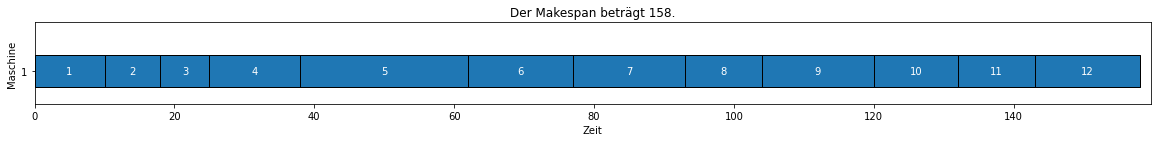

In [7]:
all_in_one = [0]*len(durations)
show_schedule( all_in_one,durations )

Schauen wir uns das Ergebnis des greedy an.

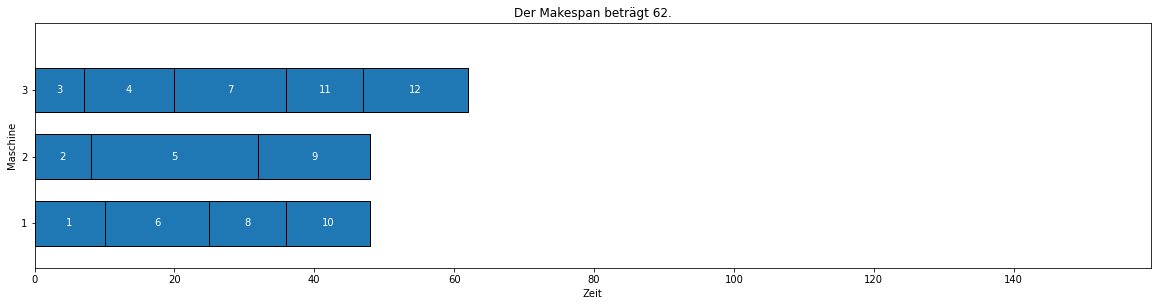

In [8]:
#### hier können Sie die Instanz ändern #### 
number_of_machines = 3
durations = [10,8,7,13,24,15,16,11,16,12,11,15]
####

greedy_schedule = greedy_makespan(durations,number_of_machines)
# Ergebnis darstellen:
show_schedule(greedy_schedule,durations)

Wir können uns den Verlauf des greedy als Animation anschauen.

In [9]:
#### hier können Sie die Instanz ändern #### 
number_of_machines = 3
durations = [10,8,7,13,24,15,16,11,16,12,11,15]
####

animation_widget